# 图卷积神经网络

## 背景
图卷积神经网络（Graph Convolutional Network, GCN）,现实中更多重要的数据集都是用图的形式存储的，例如知识图谱，社交网络、通信网络、蛋白质分子结构等等,在**图网络领域**的地位如同卷积操作在图像处理里的地位一样重要。

图卷积神经网络与传统的网络模型LSTM和CNN等所处理的数据类型有所不同。LSTM和CNN只能用于网格化结构的数据，而图卷积神经网络能够处理具有**广义拓扑图结构即邻接矩阵**的数据，并深入发掘其特征和规律。

## 介绍
对于具有拓扑结构的图数据，可以按照用于网格化结构数据的卷积的思想来定义图卷积。将**每个节点的邻居节点的特征**`(D_^-1/2)*A_*(D_^-1/2)*H `传播到该节点，再进行加权，就可以得到该点的聚合特征值。
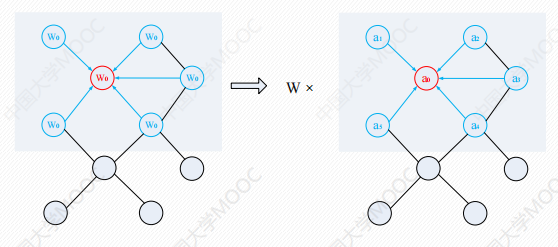

公式如下：

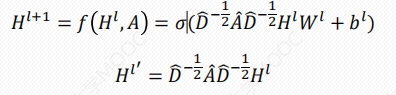

显然，**Hl+1的维度和W、B有关**。

其中：
+ A：邻接矩阵、A_=A+I
+ I：单位阵
+ D：`A_`的对角节点度矩阵（出度）
+ W：第l层的参数矩阵
+ b：第l层的偏置向量
+ H：特征矩阵
+ H'：含有拓扑信息的特征矩阵
+ σ：激活函数

## 用Numpy实现图卷积

In [33]:
import numpy as np
from math import sqrt
from functools import reduce

A = np.matrix([
    [0,1,0,0],
    [0,0,1,1],
    [0,1,0,0],
    [1,0,1,0],
], dtype=float)

H = np.matrix(
    [[i,-i] for i in range(A.shape[0])],
    dtype=float
)

I = np.matrix(np.eye(A.shape[0]))

A_ = A + I

D_ = np.array(np.sum(A_, axis=0))
# 对角线
D_sqrt = np.diag([sqrt(i) for i in D_[0]])
D_sqrt_inv = np.linalg.inv(D_sqrt)

W = np.matrix([
    [1, -1, 2],
    [-1, 1, 3]
])
b = np.matrix([
    [1],
    [0],
    [1], 
    [0]
])

In [34]:
def getDot(A,B):
    return np.dot(A,B)

def relu(x):
    return np.where(x>=0, x, 0)
# 累乘
H1 =relu(reduce(getDot,[D_sqrt_inv,A_,D_sqrt_inv,H,W]) + b)
H1

array([[1.81649658, 0.18350342, 0.59175171],
       [4.44948974, 0.        , 0.        ],
       [3.        , 0.        , 0.        ],
       [4.63299316, 0.        , 0.        ]])